In [40]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [42]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary_subgroups_cleveland/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)


subgroup_df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in subgroup_df.iloc[0:1,10:].columns.values])
subgroup_df.rename(columns=new_names, inplace=True)


subgroup_df = subgroup_df[subgroup_df['metric_accuracy'].notna()]
subgroup_df

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
432,young,logistic_regression,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.750000,0.500000,0.642857,0.562500,0.750000
433,young,logistic_regression,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,1.000000,1.000000,1.000000,1.000000,1.000000
434,young,logistic_regression,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.500000,0.333333,0.500000,0.500000,0.500000
435,young,logistic_regression,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.500000,0.333333,0.500000,0.500000,0.500000
436,young,logistic_regression,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128703,elder,svm,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.442308,0.519231,0.361538,0.369658,0.442308
1128704,elder,svm,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.416667,0.500000,0.300000,0.267094,0.416667
1128705,elder,svm,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.435897,0.500000,0.323077,0.303419,0.435897
1128706,elder,svm,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.435897,0.519231,0.333333,0.309829,0.435897


In [43]:
selection = subgroup_df[
    (subgroup_df['feature_selection_frac'] == 1.0)
    & (subgroup_df['main_metric'] == 'accuracy')
    & ((subgroup_df['train_size'] == 0.8) | subgroup_df['train_size'].isna())
    & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

In [44]:
selection = selection.reset_index()

In [45]:
pivoted_subgroup = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_subgroup.reset_index(inplace=True)
pivoted_subgroup = pivoted_subgroup.drop('index', axis=1)
pivoted_subgroup.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted_subgroup

,metric_type,train_size,validation_type,feature_selection_frac,cv_split_size,feature_selector,subgroup,par_split_size,sample_size,model,main_metric,metric_measurement
0,accuracy,0.8,ts,1.0,NaN,rfe,young,2,0.1,logistic_regression,accuracy,0.500000
1,accuracy,0.8,ts,1.0,NaN,rfe,young,2,0.1,logistic_regression,accuracy,0.500000
2,accuracy,0.8,ts,1.0,NaN,rfe,young,2,0.1,logistic_regression,accuracy,0.500000
3,accuracy,0.8,ts,1.0,NaN,rfe,young,2,0.1,logistic_regression,accuracy,0.500000
4,accuracy,0.8,ts,1.0,NaN,rfe,young,2,0.1,logistic_regression,accuracy,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
154995,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,1.0,svm,accuracy,0.410256
154996,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,1.0,svm,accuracy,0.435897
154997,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,1.0,svm,accuracy,0.467949
154998,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,1.0,svm,accuracy,0.435897


In [46]:
gf = pivoted_subgroup['subgroup'].replace({'young': 87, 'middle': 175, 'elder': 41})
r = pivoted_subgroup['sample_size'] * gf
pivoted_subgroup['sample_size'] = r
pivoted_subgroup

,metric_type,train_size,validation_type,feature_selection_frac,cv_split_size,feature_selector,subgroup,par_split_size,sample_size,model,main_metric,metric_measurement
0,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
1,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
2,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
3,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
4,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
154995,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.410256
154996,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.435897
154997,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.467949
154998,recall,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.435897


In [47]:
accuracy_subgroups = pivoted_subgroup[pivoted_subgroup['metric_type'] == 'accuracy']

In [48]:
accuracy_subgroups_lr = accuracy_subgroups[accuracy_subgroups['model'] == 'logistic_regression']
accuracy_subgroups_lr

,metric_type,train_size,validation_type,feature_selection_frac,cv_split_size,feature_selector,subgroup,par_split_size,sample_size,model,main_metric,metric_measurement
0,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
1,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
2,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
3,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
4,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,logistic_regression,accuracy,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
15495,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,logistic_regression,accuracy,0.833333
15496,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,logistic_regression,accuracy,0.852564
15497,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,logistic_regression,accuracy,0.858974
15498,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,logistic_regression,accuracy,0.852564


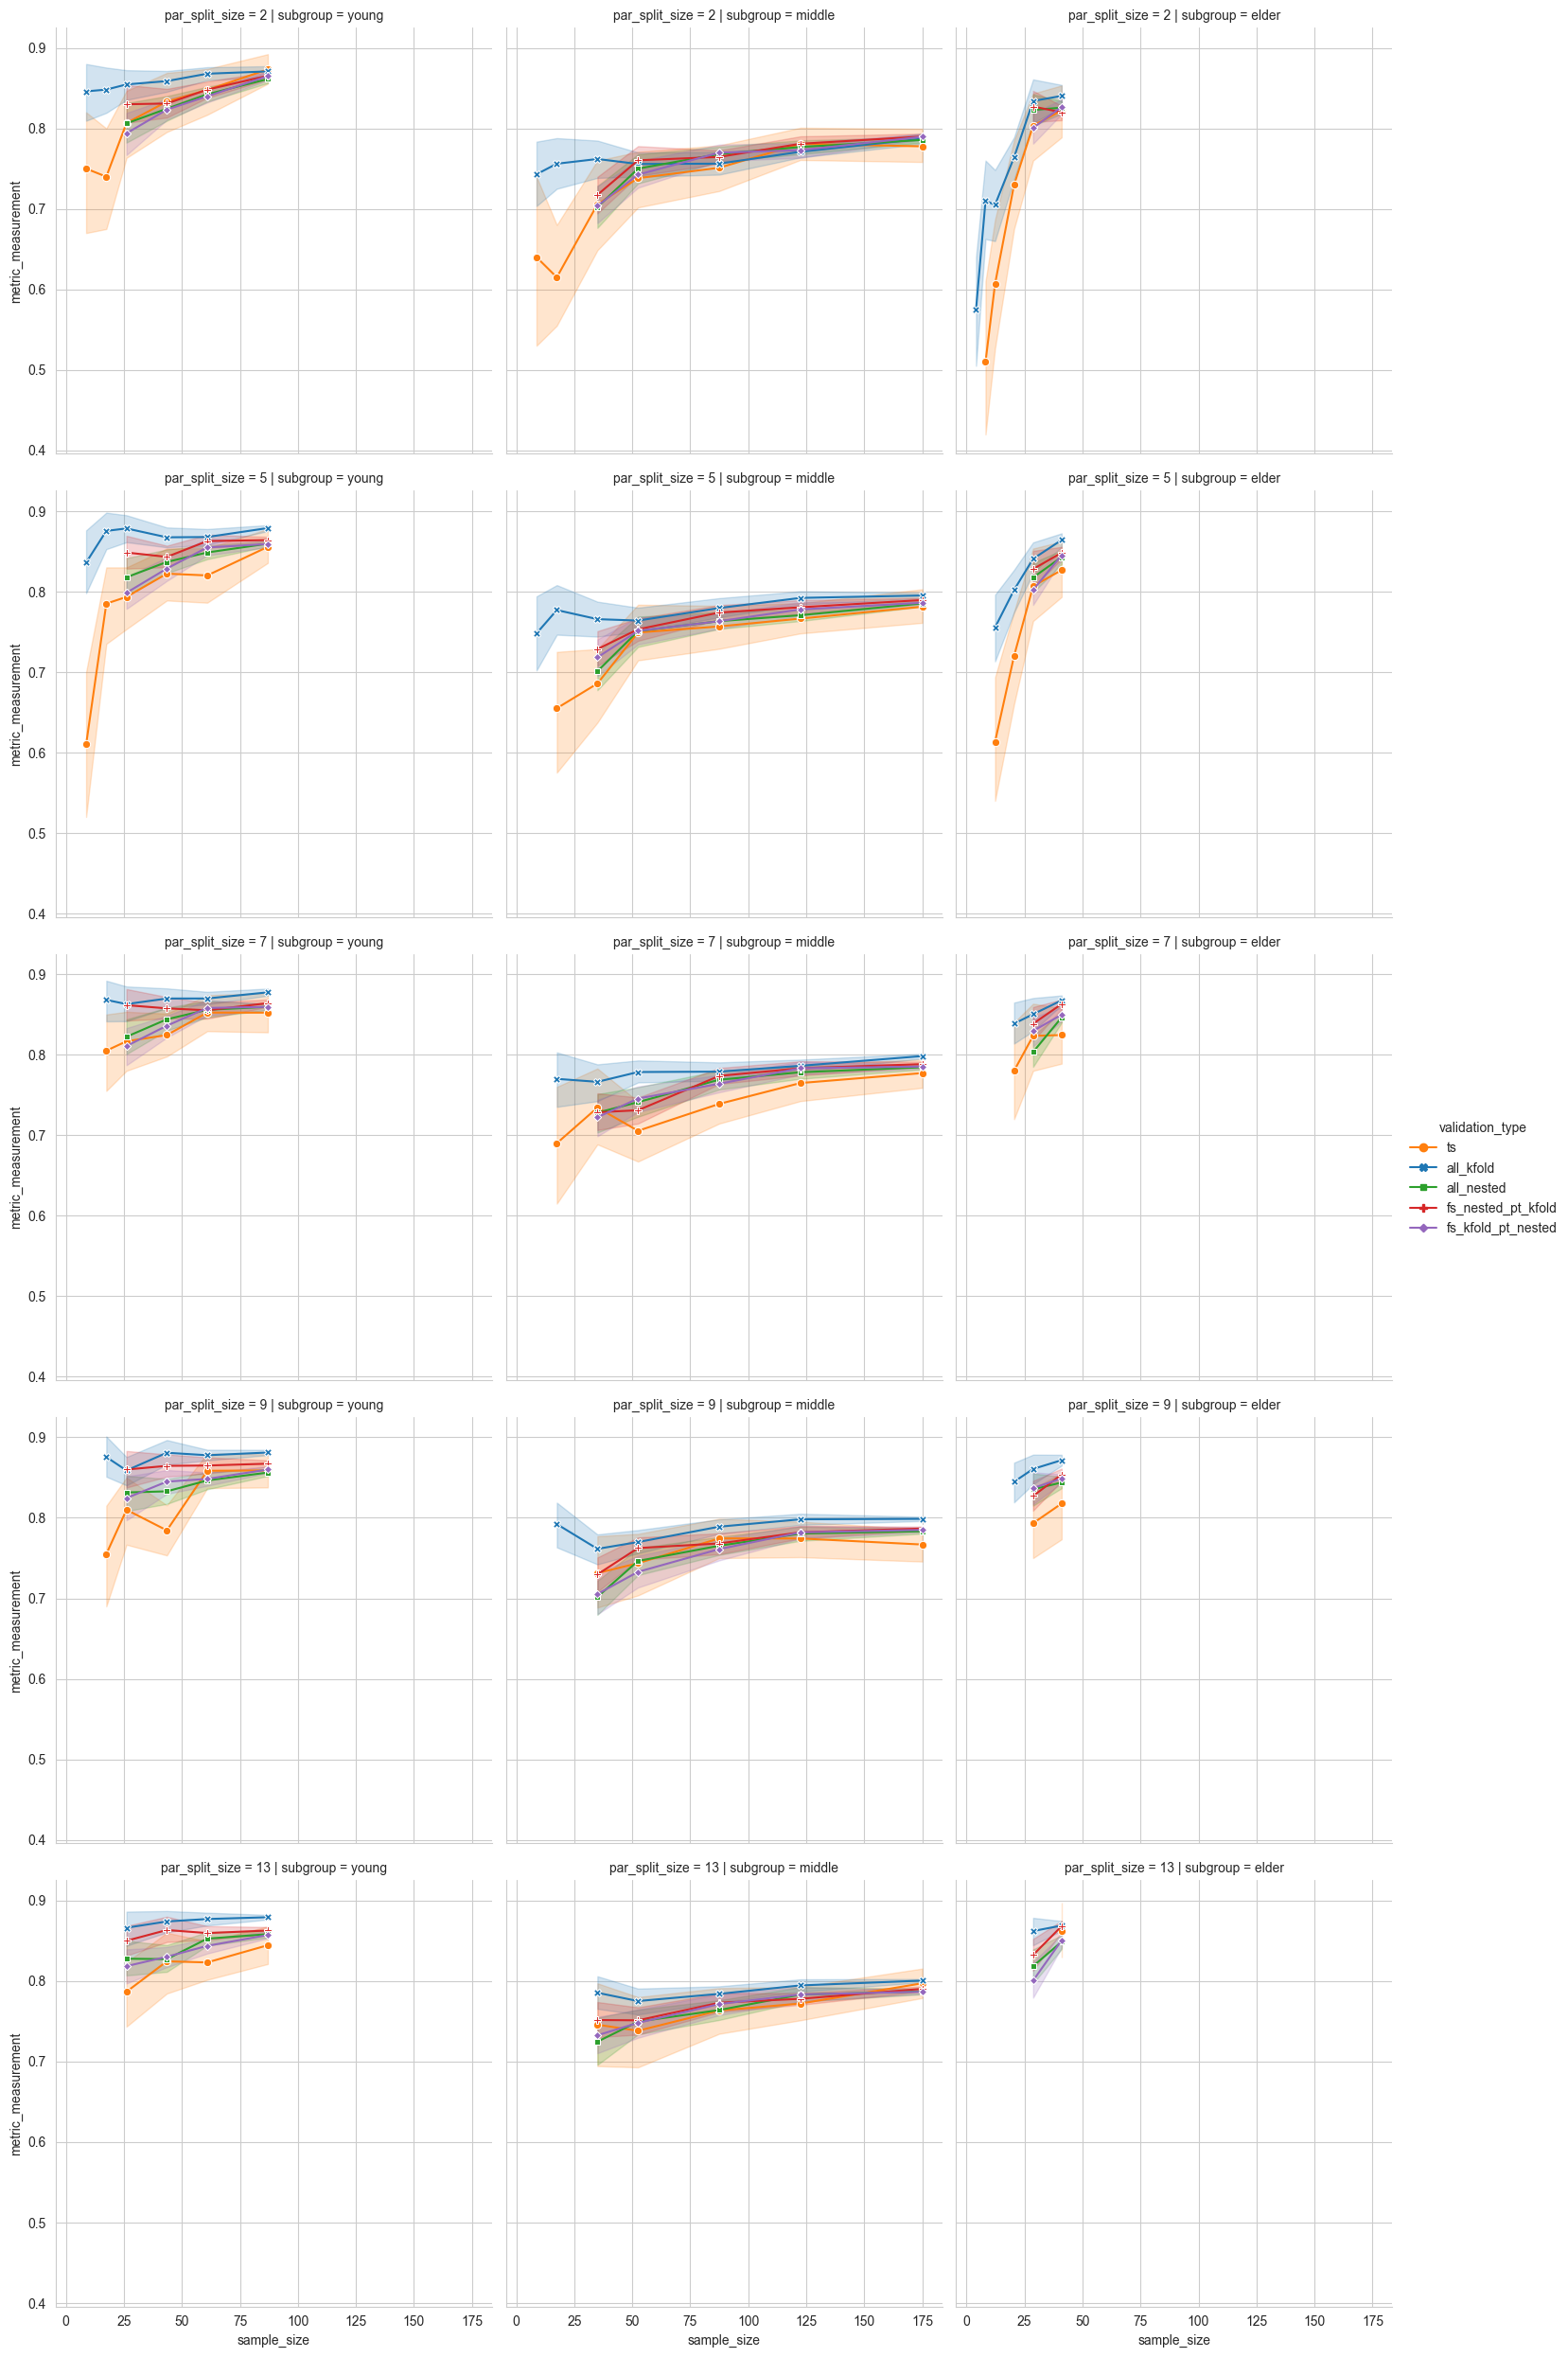

In [49]:
sns.relplot(x='sample_size', data=accuracy_subgroups_lr, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='subgroup', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [50]:
accuracy_subgroups_svm = accuracy_subgroups[accuracy_subgroups['model'] == 'svm']
accuracy_subgroups_svm

,metric_type,train_size,validation_type,feature_selection_frac,cv_split_size,feature_selector,subgroup,par_split_size,sample_size,model,main_metric,metric_measurement
15500,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,svm,accuracy,0.500000
15501,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,svm,accuracy,0.500000
15502,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,svm,accuracy,0.500000
15503,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,svm,accuracy,0.500000
15504,accuracy,0.8,ts,1.0,NaN,rfe,young,2,8.7,svm,accuracy,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
30995,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.410256
30996,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.435897
30997,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.467949
30998,accuracy,NaN,fs_kfold_pt_nested,1.0,13.0,rfe,elder,13,41.0,svm,accuracy,0.435897


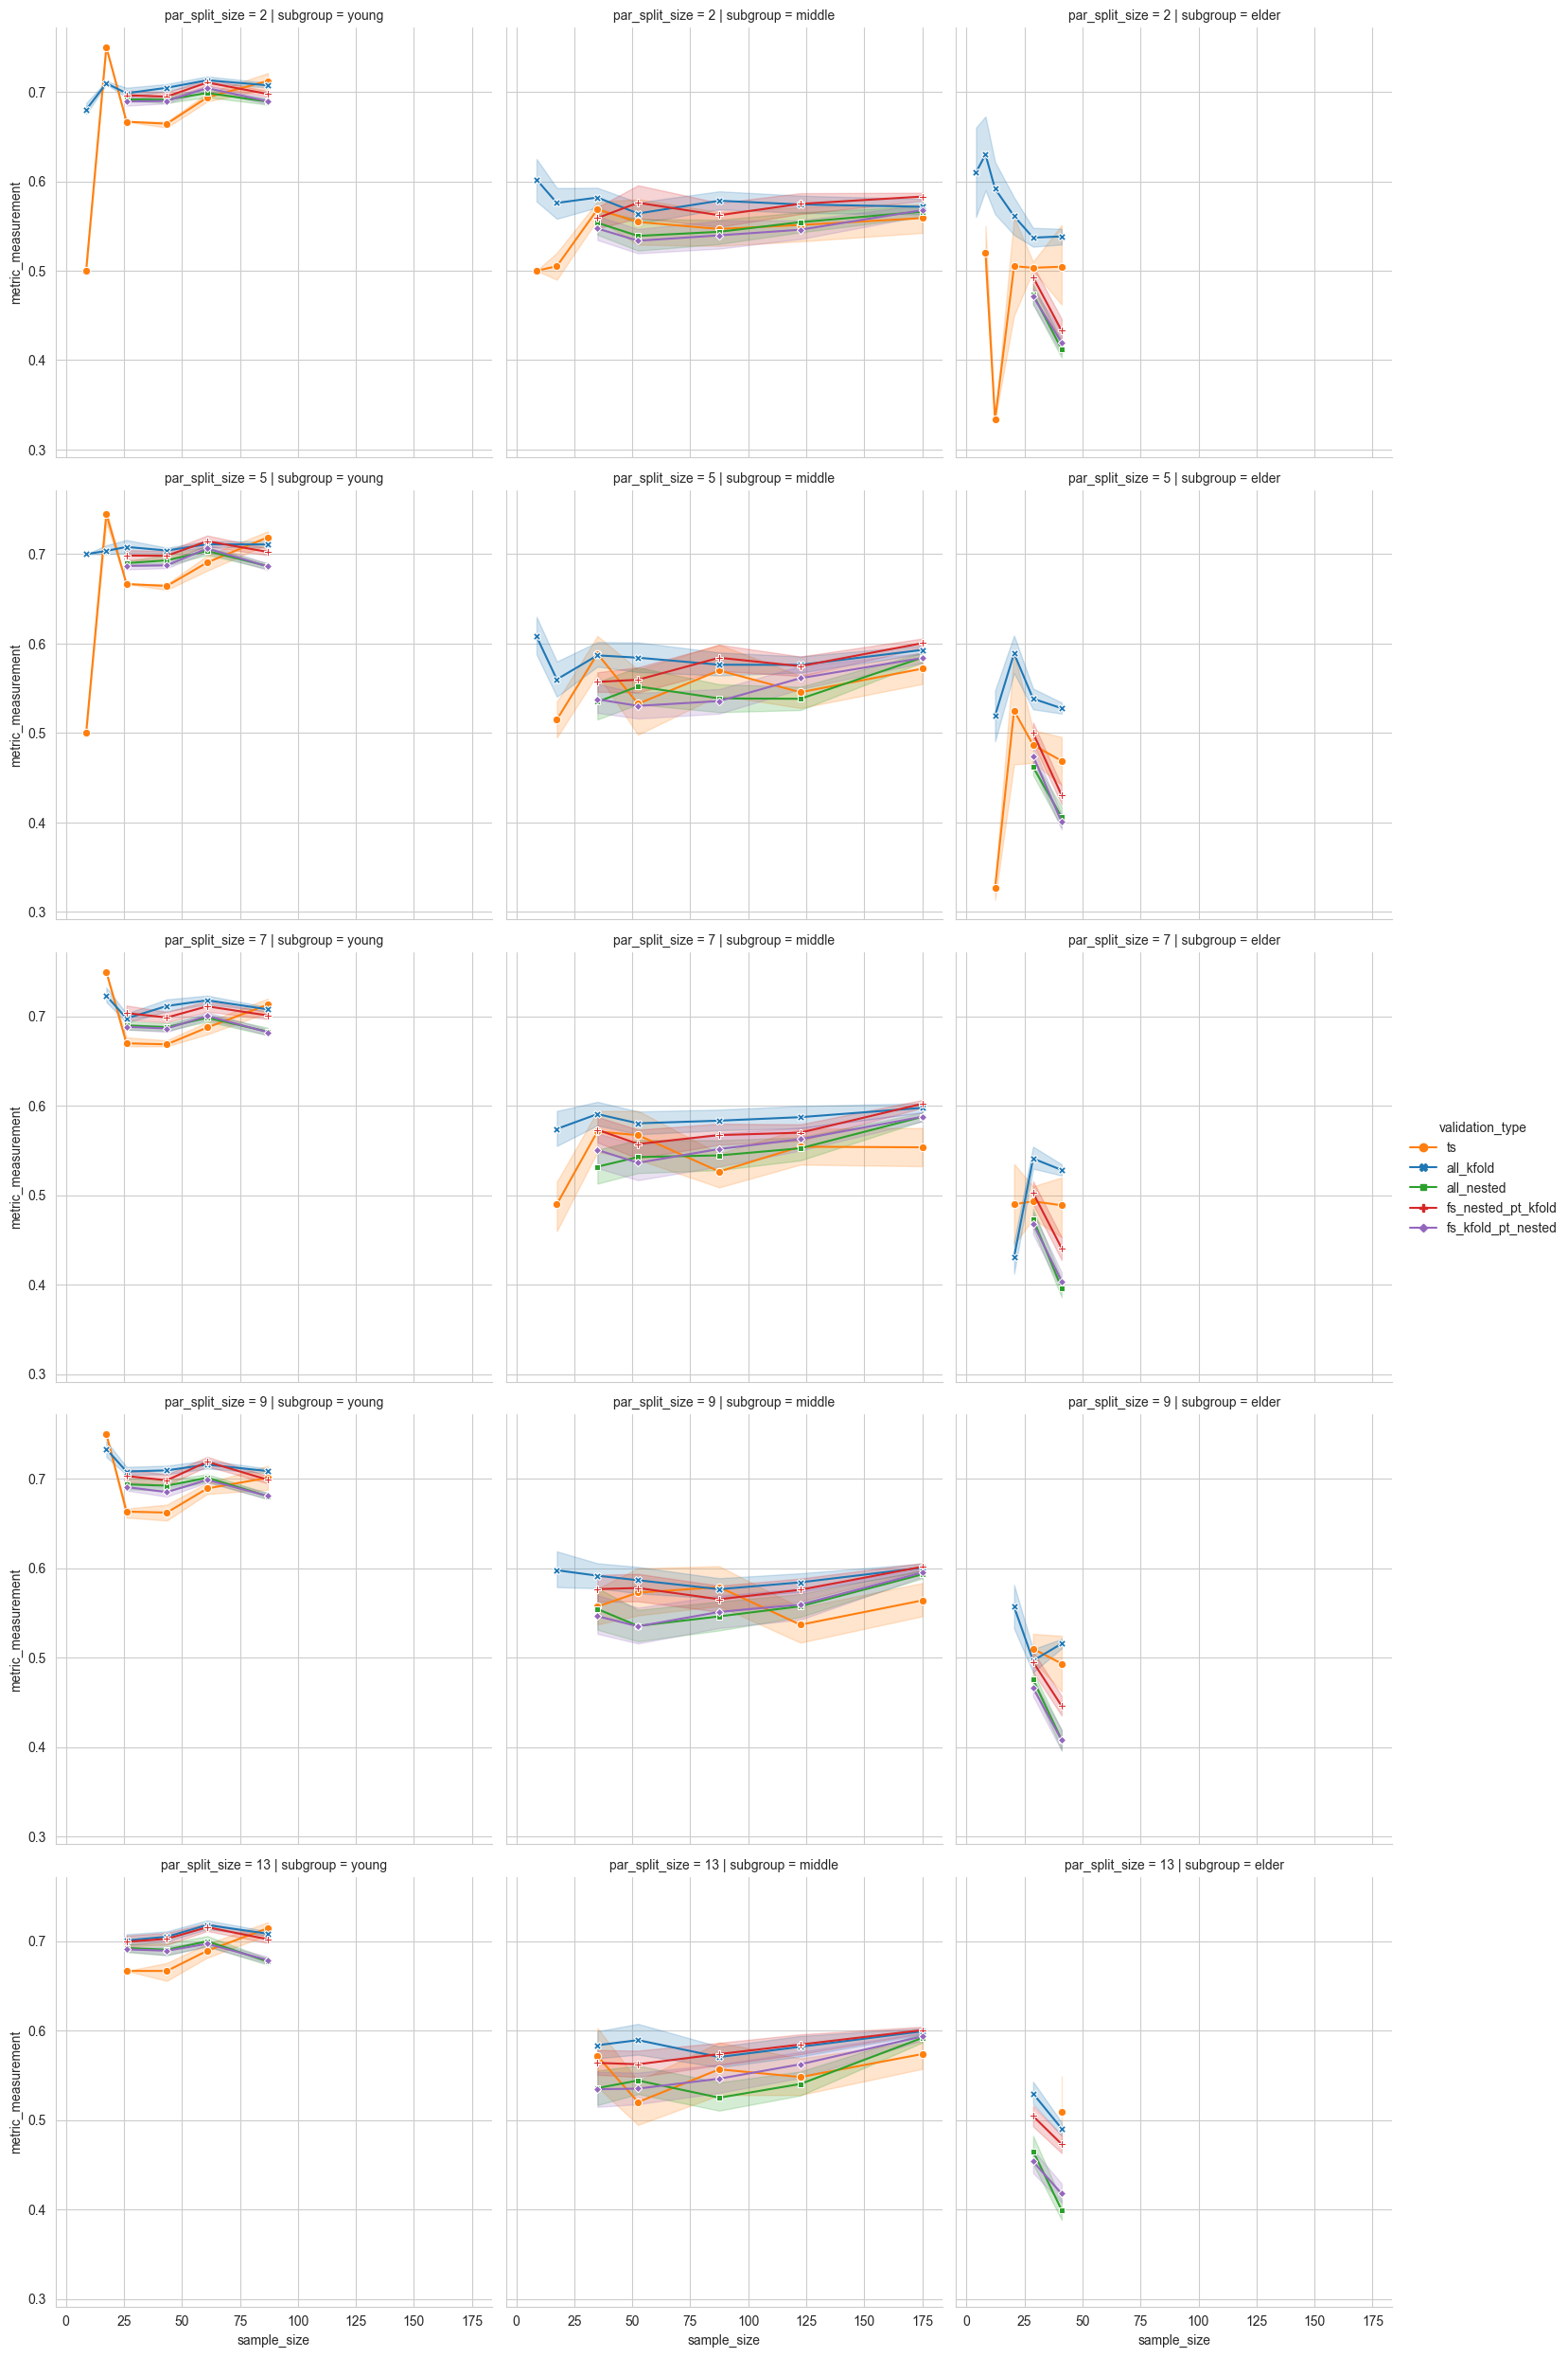

In [51]:
sns.relplot(x='sample_size', data=accuracy_subgroups_svm, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='subgroup', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()